# Perceptrons with Different Depths

- Rewrited experiments on [this link](https://qiita.com/tanuk1647/items/544e2da93d0ae896e72e#%E7%B5%90%E8%AB%96) with keras.

## Initialisation

### Import Modules

In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np

### Define Grapher

In [ ]:
def grapher(X, Y, Z):
    fig = plt.figure(figsize=(6, 4), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z)
    plt.show()

## Define Network

In [ ]:
def Network(*inputs, depth=1):
    model = Sequential()
    model.add(Dense(16, input_shape=(2,)))

    for i in range(depth):
        if not i == 0:
            model.add(Dense(16))
        model.add(Activation('relu'))

    model.add(Dense(1))

    #model.summary()
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=[])

    x, y, *_ = inputs
    flat_width = np.prod(x.shape)

    # flatten into 1 dimension
    inputs = np.append(x, y)
    # make x batches
    inputs = np.reshape(inputs, (2, flat_width))
    inputs = inputs.transpose()

    z = model.predict(inputs, batch_size=1)
    z = np.reshape(z, (x.shape[0], x.shape[1]))

    return z

## Main Results

In [ ]:
x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-10.0, 10.0, 0.1)

X, Y = np.meshgrid(x, y)

### Depth 1

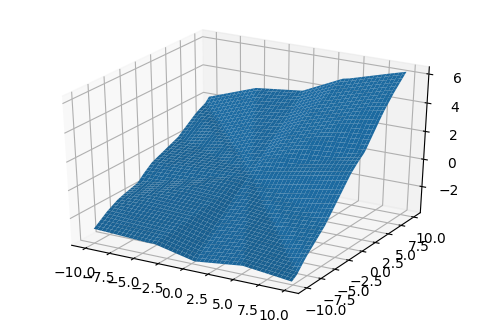

In [ ]:
Z1 = Network(X, Y, depth=1)
grapher(X, Y, Z1)

### Depth 5

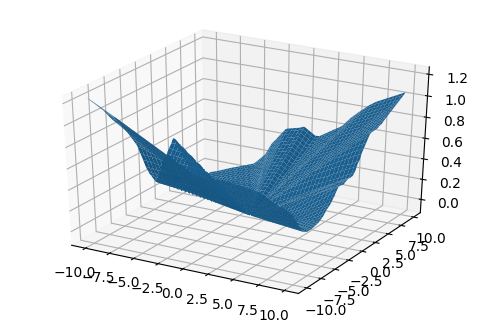

In [ ]:
Z2 = Network(X, Y, depth=5)
grapher(X, Y, Z2)

### Depth 8

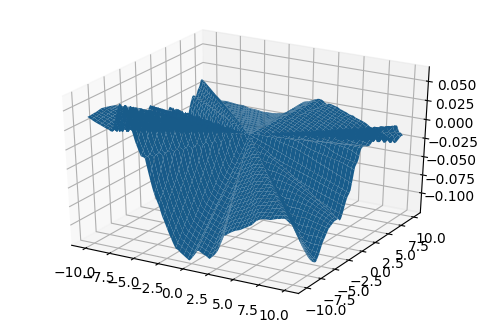

In [ ]:
Z2 = Network(X, Y, depth=8)
grapher(X, Y, Z2)

### Depth 9

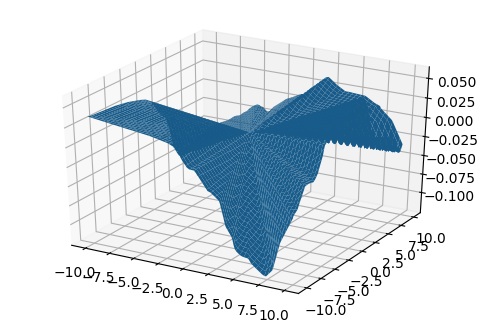

In [ ]:
Z2 = Network(X, Y, depth=9)
grapher(X, Y, Z2)

### Depth 10

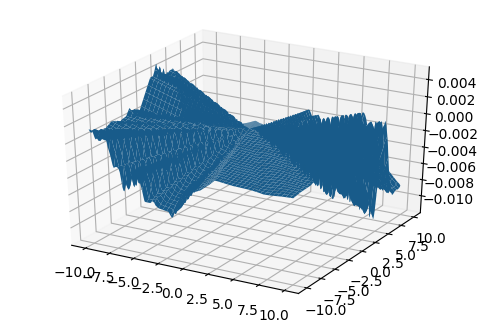

In [ ]:
Z3 = Network(X, Y, depth=10)
grapher(X, Y, Z3)